In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df['Date'] = pd.to_datetime(df.Date, errors='coerce')

In [4]:
df.Date.dtype

dtype('<M8[ns]')

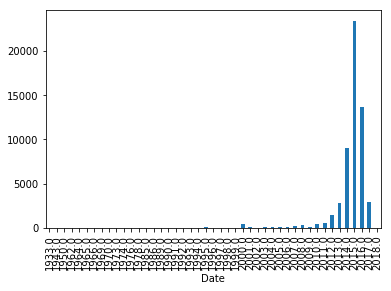

In [10]:
df.id.groupby([df["Date"].dt.year]).count().plot(kind="bar")

In [37]:
df.id.groupby([df["Date"].dt.year]).count()

Date
1999.0       18
2000.0      384
2001.0       54
2002.0       11
2003.0       36
2004.0       80
2005.0       38
2006.0       43
2007.0      166
2008.0      357
2009.0      124
2010.0      394
2011.0      530
2012.0     1483
2013.0     2851
2014.0     8978
2015.0    23436
2016.0    13672
2017.0     2953
2018.0        1
Name: id, dtype: int64

In [39]:
df.to_csv('data.csv', index=False)